In [45]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('D:/Python Lectures/Data/indicators.csv',sep=',')
data.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [5]:
data.shape  #number of rows and number of columns

(5656458, 6)

Unique 

In [9]:
countries= data['CountryName'].unique().tolist() # tolist = coverts into list 
len(countries)

247

In [11]:
# how many country code are there ?
countryCodes= data['CountryCode'].unique().tolist()
len(countryCodes)


247

In [12]:
# how many indicators are there
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [15]:
#How many years of data do we have?
years = data['Year'].unique().tolist()
len(years)


56

In [17]:
print(min(years), 'to' ,max(years))

1960 to 2015


# Basic Plotting part-1
let pick a counry an indicator to explore: CO2 Emissions per capita and the USA

In [4]:
# select CO2 emissions for the United states
hist_indicator= 'CO2 emissions \(metric'
hist_country="USA"

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

#storage is just those indicators atchig the USA for hte country code and CO2 emissions over time.
stage =data[mask1 & mask2]

In [5]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


Lets see how emissions have changed over time using matplotlip

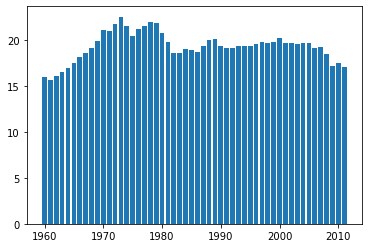

In [26]:
#get the years 
years = stage['Year'].values
#get the values
co2= stage['Value'].values

#create
plt.bar(years,co2)
plt.show()

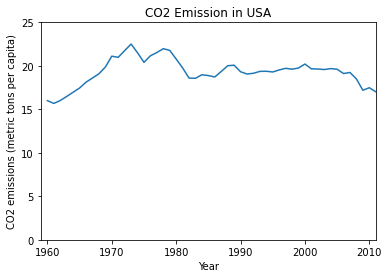

In [27]:
#switch to line plot
plt.plot(stage['Year'].values,stage['Value'].values)

#label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label to figure 
plt.title('CO2 Emission in USA')

#to make more honest, start they y axis at 0
plt.axis([1959,2011,0,25])

plt.show()

In [6]:
#otherwise lets look at all data
hist_data = stage['Value'].values

In [7]:
print(len(hist_data))

52


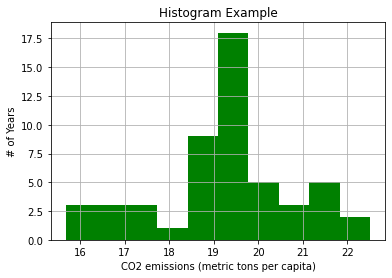

In [11]:
#the histogram of the data
plt.hist(hist_data, 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)
plt.show()

But how do the USA numbers relate to those of other countries?

In [16]:
#select co2 emissions for all countries in2011
hist_indicator ='CO2 emissions \(metric'
hist_year= 2011

mask1= data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])# to check interger values in dataframe use '.isin'

#apply our mask
co2_2011=data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


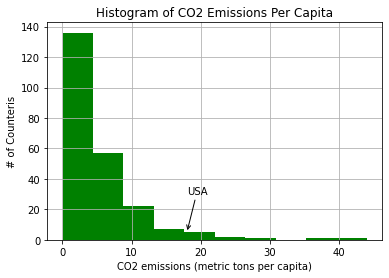

In [25]:
#subplot returns a touple with the figure ,axis attributes
fig, ax = plt.subplots()
ax.annotate("USA",
           xy=(18,5), xycoords='data',
           xytext=(18,30), textcoords='data',
           arrowprops=dict(arrowstyle='->',
                          connectionstyle='arc3'),)
plt.hist(co2_2011['Value'],10,density=False,facecolor='green')
#density :width of your bins false waill have same size of bins 
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel("# of Counteris")
plt.title("Histogram of CO2 Emissions Per Capita")

#plt.axis([10,22,0,14])
plt.grid(True)

plt.show()

Part2 
Relationship between GDP and CO2 Emissions In USa


In [27]:
#select GDP per capita emissions for the united states
hist_indicator = ('GDP per capita \(constant 2005')
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2= data['CountryCode'].str.contains(hist_country)

#stage is just those indicators matching the usa for country code and CO2 emissions over time.
gdp_stage= data[mask1 &mask2]
#plot  gdp_stage vs stage

In [28]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


In [30]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


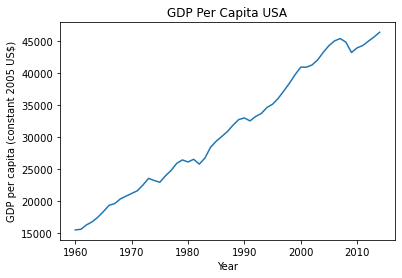

In [31]:
#switch to line plot 
plt.plot(gdp_stage['Year'].values , gdp_stage['Value'].values)

#Label the axis 
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita USA')
#to make more honest ,start the y axis at 0
#plt.axis([1959 ,2011,0,25])

plt.show()

In [32]:
# ScatterPlot for comparing GDP against CO2 emissions (per capita)

In [35]:
#first we'll need to make sure the same tiime frames
print('GDP Min Year = ',gdp_stage['Year'].min(),"Max:",gdp_stage['Year'].max())
print('CO2 Min Year = ',stage['Year'].min(),"Max:",stage['Year'].max())


GDP Min Year =  1960 Max: 2014
CO2 Min Year =  1960 Max: 2011


we have 3 extra years of GDP data ,so lets trim those off so the scattered has equal length arrays to compare this is actually required by scatterplot()

In [37]:
gdp_stagetrunc = gdp_stage[gdp_stage['Year']<2012]
print(len(gdp_stagetrunc))
print(len(stage))

52
52


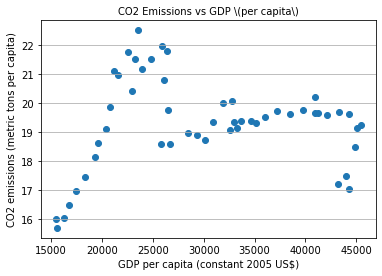

In [42]:
fig ,axis = plt.subplots()
#Grid lines ,Xticks ,Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title("CO2 Emissions vs GDP \(per capita\)",fontsize=10)
axis.set_xlabel(gdp_stagetrunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

x=gdp_stagetrunc['Value']
y=stage['Value']

axis.scatter(x,y)
plt.show()

In [47]:
np.corrcoef(gdp_stagetrunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])